## Business Objective 1

Customers Segmentation of East-West Airlines based on flying patterns to enhance use of frequent flyer rewards, and use of the airline credit card. This would lead to customer retention and higher profits.  

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np

In [6]:
sns.set()

### Data Dictionary

In [7]:
airline = pd.read_excel('EastWestAirlines (1).xlsx',sheet_name='data')

### Exploratory Data Analysis

In [8]:
airline.sample(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
2308,2326,5154,0,5,1,1,54657,28,0,0,3769,1
2786,2808,18959,0,1,1,1,0,0,0,0,2115,0
3688,3711,5269,0,3,1,1,22697,13,0,0,604,1
279,283,22652,0,5,1,1,57642,14,0,0,7271,1
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [9]:
airline.shape

(3999, 12)

In [10]:
airline.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [11]:
airline.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [12]:
airline.duplicated().sum()

0

Imputation not needed

#### Univariate analysis

##### Moments

In [13]:
cols = set(airline.columns) - {'ID#'}
airline1 = airline[list(cols)]
airline1.describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0


we can see that the mean has varied range. We would want to Standardize the data.

In [14]:
#Fisher's Kurtosis
airline1.drop(['cc1_miles','cc2_miles','cc3_miles','Award?'],axis=1).kurt(axis=0)

Balance              44.157932
Flight_miles_12mo    94.761019
Flight_trans_12      42.978152
Bonus_trans           2.745737
Days_since_enroll    -0.967505
Qual_miles           67.689351
Bonus_miles          13.630489
dtype: float64

In [15]:
#skew
airline1.drop(['cc1_miles','cc2_miles','cc3_miles','Award?'],axis=1).skew(axis=0)

Balance              5.004187
Flight_miles_12mo    7.451666
Flight_trans_12      5.490461
Bonus_trans          1.157362
Days_since_enroll    0.120174
Qual_miles           7.512395
Bonus_miles          2.842093
dtype: float64

##### Distributions

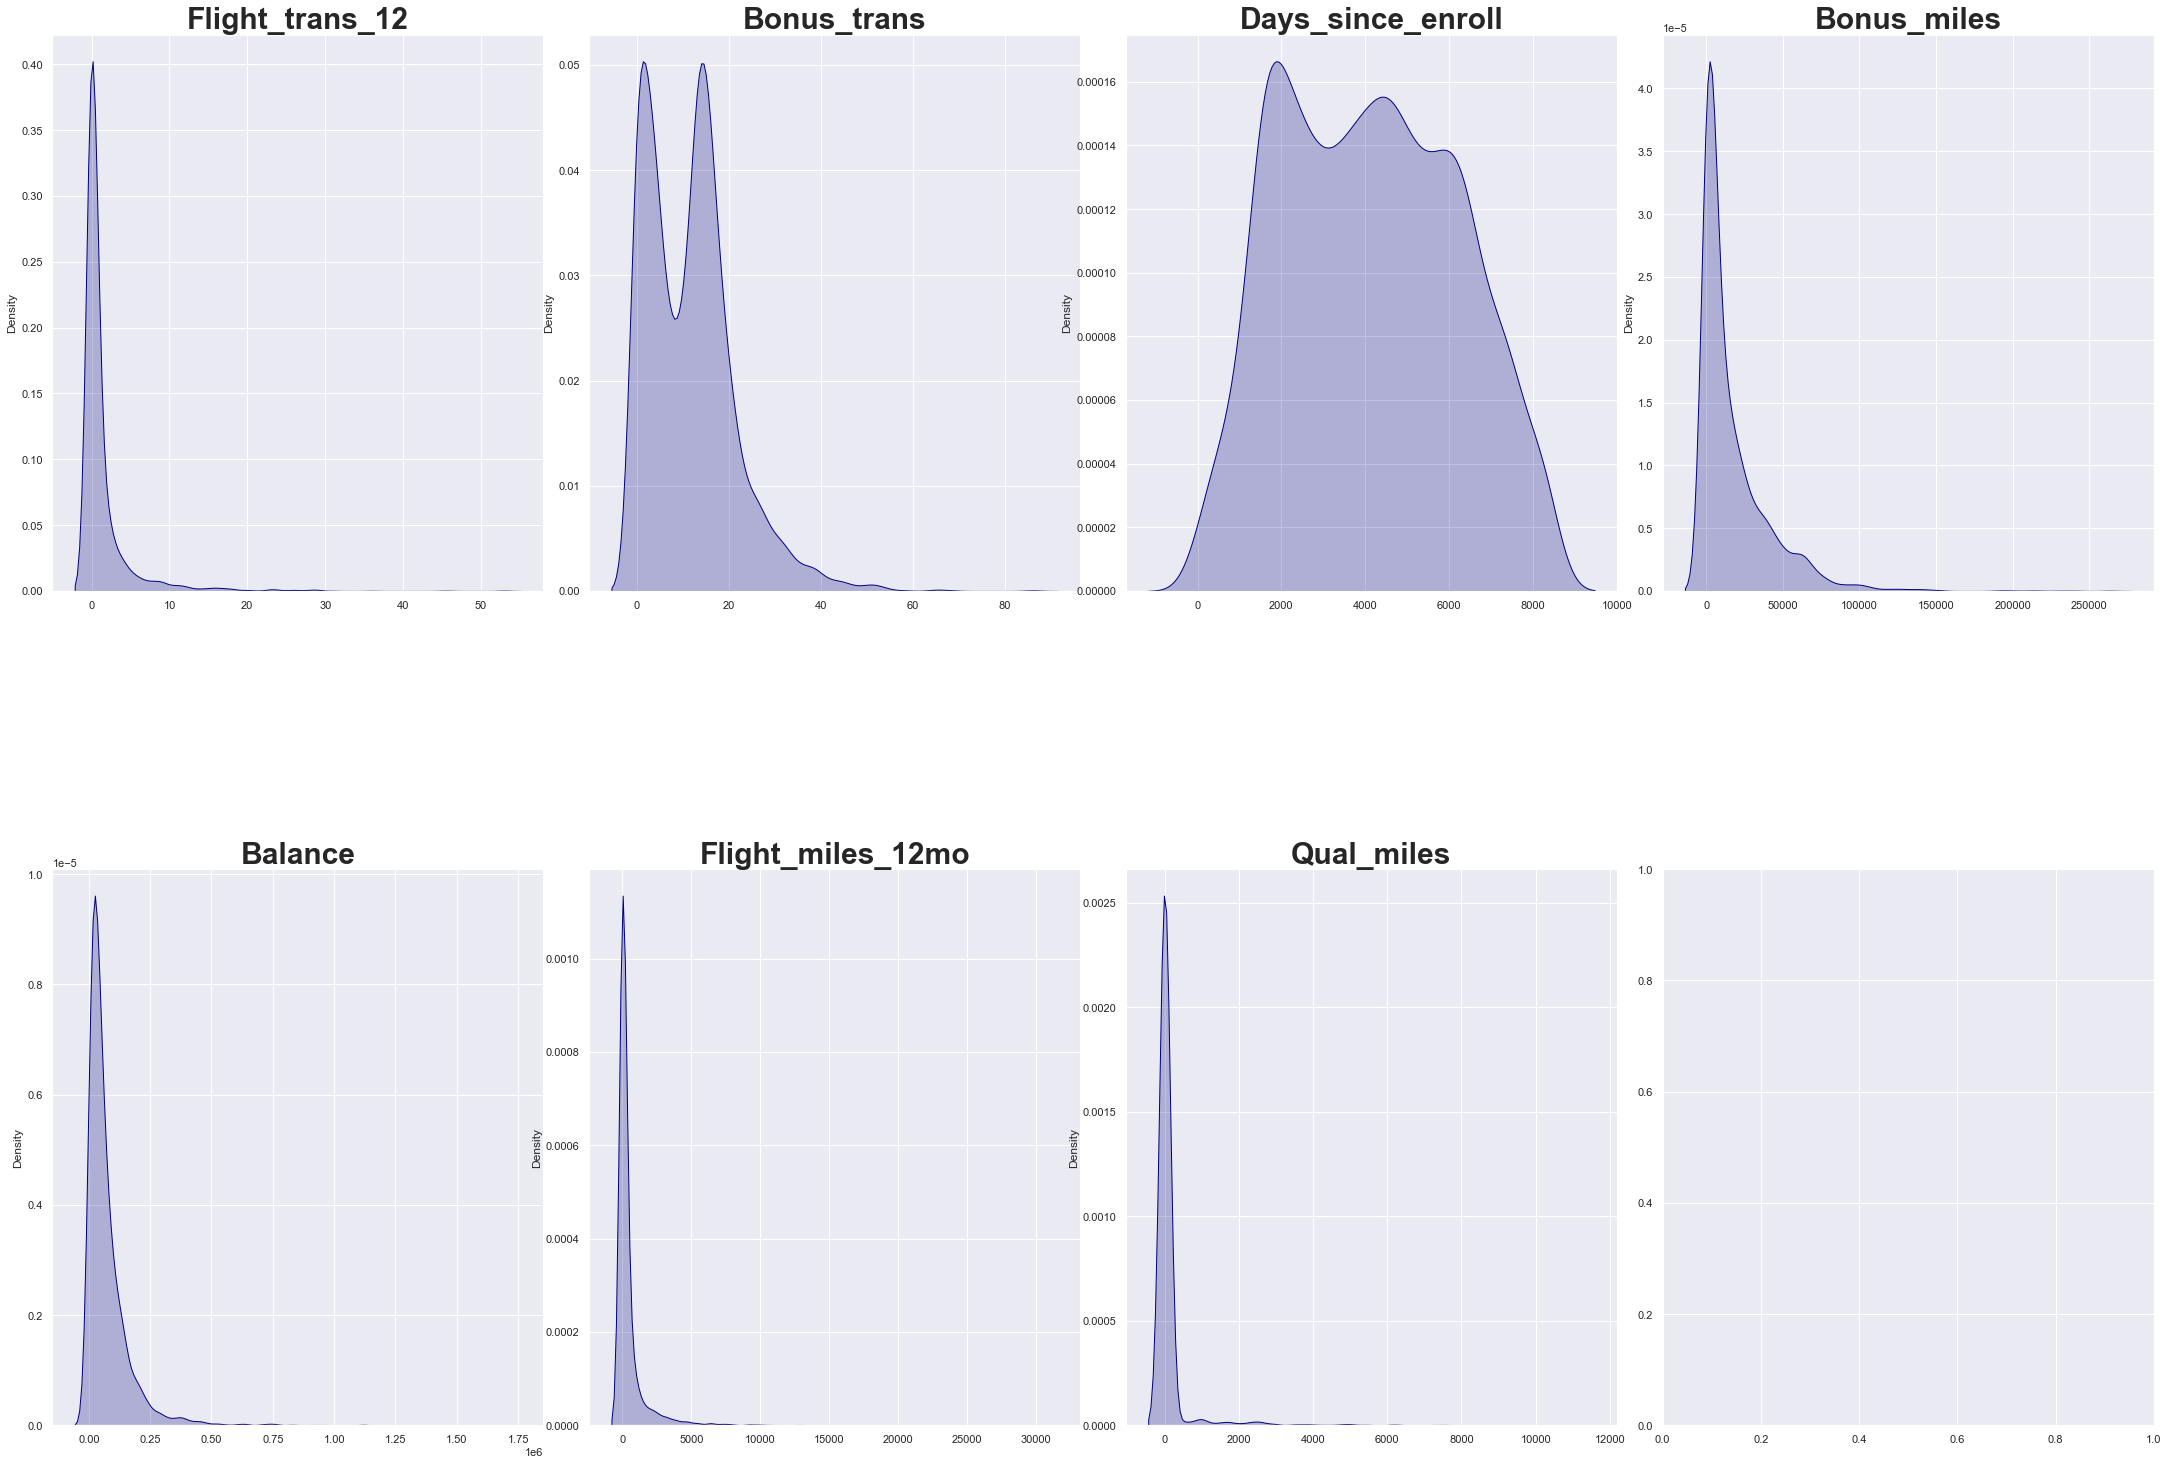

In [16]:
#display distributions for numeric data
fig, axes = plt.subplots(2, 4, sharex=False, figsize=(30,20))
fig.tight_layout()
cols = ['Flight_trans_12','Bonus_trans','Days_since_enroll','Bonus_miles','Balance','Flight_miles_12mo','Qual_miles']
axeslist = [axes[0,0],axes[0,1],axes[0,2],axes[0,3],axes[1,0],axes[1,1],axes[1,2]]
j=0
for col in cols:
    p= sns.kdeplot(data=airline1, ax=axeslist[j] ,x=col,fill=True,color="navy")
    p.set(xlabel=None)
    fig.subplots_adjust(hspace=0.5)
    axeslist[j].set_title(col,fontweight="bold", size=30)
    j= j+1

**Observations:**  
    * 'Flight_trans_12', , 'Bonus_trans', 'Bonus_miles', 'Balance', 'Flight_miles_12mo', 'Qual_miles'        are right skewed  
    * Bonus_miles,Balance,Flight_miles_12mo,Qual_miles are leptokurtic.
    * 'Bonus_trans', is bimodal  
    * Let's check the QQ plot for these columns

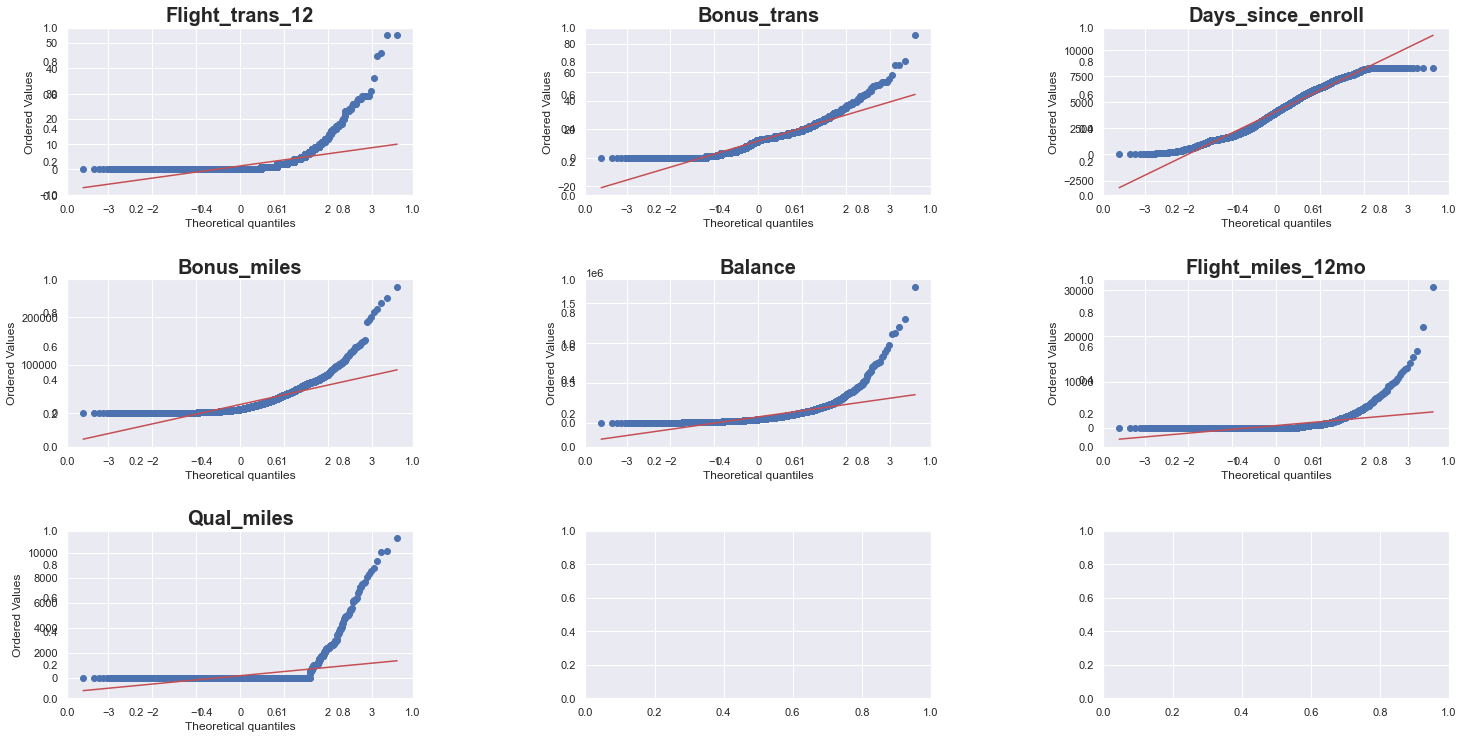

In [17]:
#Review QQ Plot for other normally distributed columns
import scipy.stats as stats
import pylab
cols = ['Flight_trans_12','Bonus_trans','Days_since_enroll','Bonus_miles','Balance','Flight_miles_12mo','Qual_miles']
fig, axes = plt.subplots(3, 3, sharex=False, figsize=(20,10))
fig.tight_layout()
nfig = [1,2,3,4,5,6,7]
j=0

for col in cols:
    ax = fig.add_subplot(3, 3, nfig[j])
    p=stats.probplot(airline1[col], dist="norm", plot=ax)
    ax.set_title(col,fontweight="bold", size=20)
    fig.subplots_adjust(wspace=0.5)
    fig.subplots_adjust(hspace=0.5)
    j= j+1


**Observations:**  
    * All columns are not normally distributed   
    * We will apply 'yeo-johnson' PowerTransformer on the non gaussian features when we create pipeline. 

In [18]:
from scipy.stats import shapiro
def shapiroWilkTest(df):
    # create an Empty DataFrame object
    scorecard = pd.DataFrame()
    alpha = 0.05
    clm= []
    stat1=[]
    p1=[]
    dist=[]
    j=0
    for c in df.columns:  
        stat, p = shapiro(df.iloc[:,j])
        clm.append(c)
        stat1.append(stat)
        p1.append(p)
        if p > alpha:
            dist.append('Gaussian') 
        else:
            dist.append('Not Gaussian')
        j=j+1
    scorecard['column'] = clm
    scorecard['stat'] = stat1
    scorecard['p'] = p1
    scorecard['Distribution'] = dist
    return scorecard

In [19]:
#Apply Shapiro-Wilk to test the null hypothesis that the data was drawn from a normal distribution.
shapiroWilkTest(airline1.drop(['cc1_miles','cc2_miles','cc3_miles','Award?'],axis=1))

,column,stat,p,Distribution
0,Balance,0.599004,0.000000e+00,Not Gaussian
1,Flight_miles_12mo,0.355629,0.000000e+00,Not Gaussian
2,Flight_trans_12,0.401399,0.000000e+00,Not Gaussian
3,Bonus_trans,0.910475,1.541428e-43,Not Gaussian
4,Days_since_enroll,0.974288,2.944762e-26,Not Gaussian
5,Qual_miles,0.187021,0.000000e+00,Not Gaussian
6,Bonus_miles,0.705277,0.000000e+00,Not Gaussian


##### Outlier Treatment

In [20]:
#split dataframe to get numeric data
airline1_num = airline1.drop(['cc1_miles','cc2_miles','cc3_miles','Award?'],axis=1)

In [21]:
from sklearn.preprocessing import MinMaxScaler
#Normalize data to view boxplot
scalerMM = MinMaxScaler()
airline1_norm= pd.DataFrame(scalerMM.fit_transform(airline1_num))
airline1_norm.columns=airline1_num.columns


In [22]:
airline1_norm.sample(4)

,Balance,Flight_miles_12mo,Flight_trans_12,Bonus_trans,Days_since_enroll,Qual_miles,Bonus_miles
2288,0.148120,0.016225,0.018868,0.197674,0.460092,0.0,0.164560
217,0.035075,0.000000,0.000000,0.046512,0.897275,0.0,0.026809
1453,0.111570,0.058409,0.113208,0.441860,0.613576,0.0,0.140782
235,0.106941,0.008859,0.018868,0.197674,0.891608,0.0,0.073910


<AxesSubplot:>

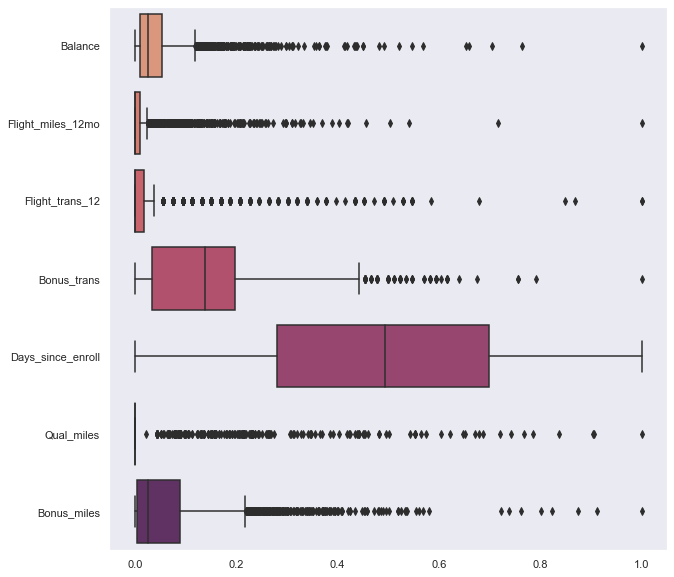

In [23]:
#View outliers for non Gaussian distributions
plt.figure(figsize=(10,10))
sns.set_style("dark")
sns.boxplot(data=airline1_norm, orient="h", palette = 'flare')

In [24]:
#function to get outliers from all numeric features
def IQR_Outliers (X, features):
    
    Outlier_df = pd.DataFrame()
    ulimit=[]
    llimit=[]
    no_of_outliers =[]
    perc = []
    feature = []


    indices = [x for x in X.index]
    print('Number of samples: ', len(indices))
    
    out_indexlist = []
        
    for col in features:
       
        #Using nanpercentile instead of percentile because of nan values
        Q1 = np.nanpercentile(X[col], 25.)
        Q3 = np.nanpercentile(X[col], 75.)
        
        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
        
        feature.append(col)        
        ulimit.append(upper)
        llimit.append(lower)
                
        outliers_index = X[col][(X[col] < lower) | (X[col] > upper)].index.tolist()
        outliers = X[col][(X[col] < lower) | (X[col] > upper)].values
        

        no_of_outliers.append(len(outliers))
        perc.append(round((len(outliers)*100)/len(indices),2))

        out_indexlist.extend(outliers_index)
    
    Outlier_df['feature'] = feature
    Outlier_df['no_of_outliers']= no_of_outliers 
    Outlier_df['percentage']= perc
    Outlier_df['upper_limit']= ulimit
    Outlier_df['lower_limit']= llimit
                   
    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))
    out_indexlist.sort()
    print('\nNumber of rows with outliers: ', len(out_indexlist))
    return Outlier_df   


In [25]:
#get outliers from all numeric features
IQR_Outliers(airline1, ['Flight_trans_12', 'Bonus_trans', 'Days_since_enroll','Bonus_miles', 'Balance', 'Flight_miles_12mo',
       'Qual_miles'])

Number of samples:  3999

Number of rows with outliers:  1090


,feature,no_of_outliers,percentage,upper_limit,lower_limit
0,Flight_trans_12,565,14.13,2.50,-1.50
1,Bonus_trans,63,1.58,38.00,-18.00
2,Days_since_enroll,0,0.00,10981.25,-2860.75
3,Bonus_miles,280,7.00,57626.25,-32575.75
4,Balance,266,6.65,203218.75,-92287.25
5,Flight_miles_12mo,569,14.23,777.50,-466.50
6,Qual_miles,226,5.65,0.00,0.00


We will consider only upper limits as Flight_trans_12', 'Bonus_trans','Bonus_miles', 'Balance', 'Flight_miles_12mo'.    
'Qual_miles' has 164 unique values and 226 outliers on the right side. We will exclude this field from treatment, else we end up with all zero values.

We will author a custom Transformer to cap the outliers

In [26]:
from sklearn.base import BaseEstimator,TransformerMixin
class OutlierCapper(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor
        
    def outlier_cap(self,X,y=None):
        X = pd.Series(X).copy()
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (self.factor * iqr)
        upper_bound = q3 + (self.factor * iqr)
        X.loc[(X < lower_bound)] = lower_bound 
        X.loc[(X > upper_bound)] = upper_bound 
        return pd.Series(X)
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return X.apply(self.outlier_cap)

In [27]:
from sklearn.compose import ColumnTransformer
outlierTreatment = ColumnTransformer([
    ('outlier_capper',OutlierCapper(),['Flight_trans_12', 'Bonus_trans', 'Days_since_enroll','Bonus_miles', 'Balance', 'Flight_miles_12mo'])
],remainder='passthrough')

In [28]:
data_without_outliers = pd.DataFrame(outlierTreatment.fit_transform(airline1),columns=airline1.columns)

In [29]:
IQR_Outliers(data_without_outliers, ['Flight_trans_12', 'Bonus_trans', 'Days_since_enroll','Bonus_miles', 'Balance', 'Flight_miles_12mo',
       'Qual_miles'])

Number of samples:  3999

Number of rows with outliers:  61


,feature,no_of_outliers,percentage,upper_limit,lower_limit
0,Flight_trans_12,0,0.00,57626.25,-32575.75
1,Bonus_trans,0,0.00,203218.75,-92287.25
2,Days_since_enroll,18,0.45,1.00,1.00
3,Bonus_miles,43,1.08,1.00,1.00
4,Balance,0,0.00,2.50,-1.50
5,Flight_miles_12mo,0,0.00,38.00,-18.00
6,Qual_miles,0,0.00,6.00,-2.00


<AxesSubplot:>

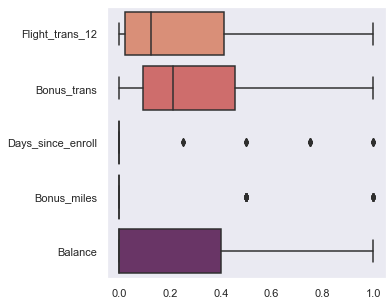

In [30]:
#View boxplot post outlier treatment
scalerMM = MinMaxScaler()
data_without_outliers_norm= pd.DataFrame(scalerMM.fit_transform(data_without_outliers))
data_without_outliers_norm.columns=data_without_outliers.columns
plt.figure(figsize=(5,5))
sns.set_style("dark")
df = pd.DataFrame(data = data_without_outliers_norm, columns = ['Flight_trans_12','Bonus_trans','Days_since_enroll','Bonus_miles','Balance'])
sns.boxplot(data=df, orient="h", palette = 'flare')

**Observations**  
* The outliers are replaced with the upper limits at 1.5 times IQR

### Multivariate Analysis

#### Pair-wise Scatter Plots

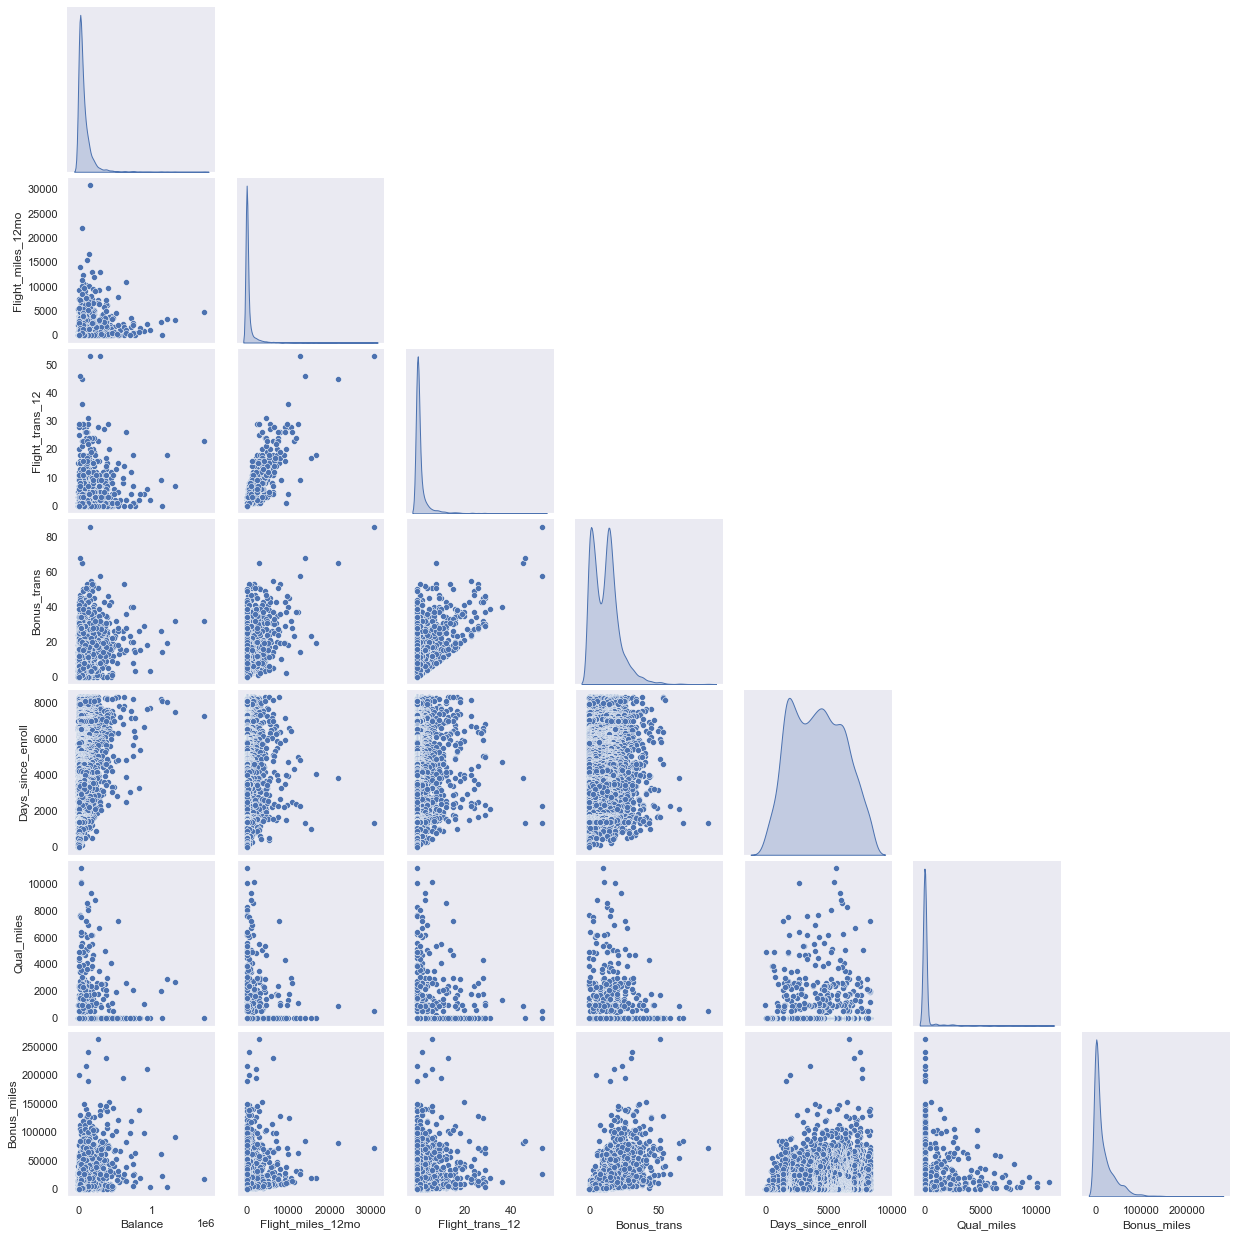

In [31]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 30,20
sns.pairplot(airline1_num,diag_kind="kde", diag_kws=dict(shade=True),corner=True)
#fig.suptitle('Airline Attributes Pairwise Plots', fontsize=14)

**Observations**  
* Flight_miles_12mo and Flight_trans_12 have a linear relationship  

#### Triangular Heat Map

<AxesSubplot:>

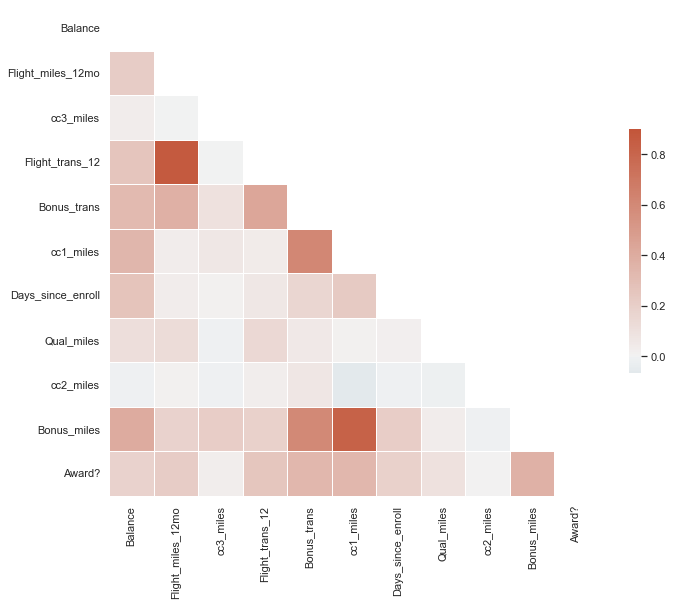

In [32]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(airline1.corr(), dtype=bool))

corr= airline1.corr(method ='pearson')

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Correlation matrix

In [33]:
airline1.corr(method ='pearson')

,Balance,Flight_miles_12mo,cc3_miles,Flight_trans_12,Bonus_trans,cc1_miles,Days_since_enroll,Qual_miles,cc2_miles,Bonus_miles,Award?
Balance,1.000000,0.217551,0.035243,0.255700,0.324935,0.338344,0.263129,0.108722,-0.008804,0.403487,0.178494
Flight_miles_12mo,0.217551,1.000000,-0.001777,0.869193,0.377216,0.037370,0.037271,0.126774,0.010598,0.183536,0.217715
cc3_miles,0.035243,-0.001777,1.000000,-0.001117,0.097313,0.060555,0.010832,-0.007779,-0.006166,0.204134,0.023484
Flight_trans_12,0.255700,0.869193,-0.001117,1.000000,0.432364,0.041333,0.059260,0.144004,0.028284,0.185261,0.247909
Bonus_trans,0.324935,0.377216,0.097313,0.432364,1.000000,0.608943,0.161262,0.050725,0.064399,0.603180,0.333893
cc1_miles,0.338344,0.037370,0.060555,0.041333,0.608943,1.000000,0.230849,0.007931,-0.068223,0.825200,0.335457
Days_since_enroll,0.263129,0.037271,0.010832,0.059260,0.161262,0.230849,1.000000,0.017312,-0.005807,0.210397,0.188121
Qual_miles,0.108722,0.126774,-0.007779,0.144004,0.050725,0.007931,0.017312,1.000000,-0.013923,0.031021,0.095256
cc2_miles,-0.008804,0.010598,-0.006166,0.028284,0.064399,-0.068223,-0.005807,-0.013923,1.000000,-0.003969,0.005332
Bonus_miles,0.403487,0.183536,0.204134,0.185261,0.603180,0.825200,0.210397,0.031021,-0.003969,1.000000,0.373506


In [34]:
#Get only highly correlated items

df = airline1.corr().abs().round(1)
df = airline1.corr().round(1)
for column in df:
    ac = df[column].round(1)
    replace_col = df[((ac < 0.5) & (ac >= 0))| ((ac > -0.5) & (ac <= 0))].index
    df.at[replace_col, column]='blah'
df

,Balance,Flight_miles_12mo,cc3_miles,Flight_trans_12,Bonus_trans,cc1_miles,Days_since_enroll,Qual_miles,cc2_miles,Bonus_miles,Award?
Balance,1.0,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah
Flight_miles_12mo,blah,1.0,blah,0.9,blah,blah,blah,blah,blah,blah,blah
cc3_miles,blah,blah,1.0,blah,blah,blah,blah,blah,blah,blah,blah
Flight_trans_12,blah,0.9,blah,1.0,blah,blah,blah,blah,blah,blah,blah
Bonus_trans,blah,blah,blah,blah,1.0,0.6,blah,blah,blah,0.6,blah
cc1_miles,blah,blah,blah,blah,0.6,1.0,blah,blah,blah,0.8,blah
Days_since_enroll,blah,blah,blah,blah,blah,blah,1.0,blah,blah,blah,blah
Qual_miles,blah,blah,blah,blah,blah,blah,blah,1.0,blah,blah,blah
cc2_miles,blah,blah,blah,blah,blah,blah,blah,blah,1.0,blah,blah
Bonus_miles,blah,blah,blah,blah,0.6,0.8,blah,blah,blah,1.0,blah


**Observations**  
* We can see that Flight_miles_12mo and Flight_trans_12 have very high positive correlation (0.9).
* Bonus_miles and Bonus_trans have  high positive correlation (0.6)  
* cc1_miles and Bonus_miles  have  very high positive correlation (0.8)  
* cc1_miles and Bonus_trans  have  high positive correlation (0.6)  

### Data Preprocessing

In [35]:
# Scaling - Standardize the numerical variables 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

cols=['Flight_trans_12', 'Bonus_trans', 'Days_since_enroll','Bonus_miles', 'Balance', 'Flight_miles_12mo','Qual_miles',
      'cc1_miles','cc2_miles','cc3_miles','Award?']

outlierTreatment = ColumnTransformer([
    ('outlier_capper',OutlierCapper(),[0,2,3,5,6,8])],remainder='passthrough')

yeojohnson = ColumnTransformer([
    ('ptransform',PowerTransformer(method='yeo-johnson', standardize=False), [0,2,3,5,6,8,9])],remainder='passthrough')

scaling = ColumnTransformer([
    ('scale',StandardScaler(), slice(0,11))])


In [36]:
airline1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Flight_miles_12mo  3999 non-null   int64
 2   cc3_miles          3999 non-null   int64
 3   Flight_trans_12    3999 non-null   int64
 4   Bonus_trans        3999 non-null   int64
 5   cc1_miles          3999 non-null   int64
 6   Days_since_enroll  3999 non-null   int64
 7   Qual_miles         3999 non-null   int64
 8   cc2_miles          3999 non-null   int64
 9   Bonus_miles        3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


### Create Pipeline

In [37]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('outlierTreatment',outlierTreatment),
    ('yeojohnson',yeojohnson),
    ('scaling',scaling)
])

In [38]:
# Apply the tranformation
airline1_transformed = pipe.fit_transform(airline1) 

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [39]:
#verify shape remains same after tranformation
tuple(map(lambda i, j: i - j, airline1.shape, airline1_transformed.shape))

(0, 0)

In [40]:
# View sample records after transformation
airline1_transformed[0:2,:]

array([[-0.39864279, -0.68171654, -0.84476649,  0.        , -0.68330804,
        -0.2447433 , -1.17840198,  0.        ,  1.39545434, -1.10406452,
        -0.7669193 ],
       [-0.69453444, -0.68171654, -0.84476649,  0.        , -0.68330804,
        -0.2447433 , -1.1324161 ,  0.        ,  1.37995704, -0.99992616,
        -0.7669193 ]])

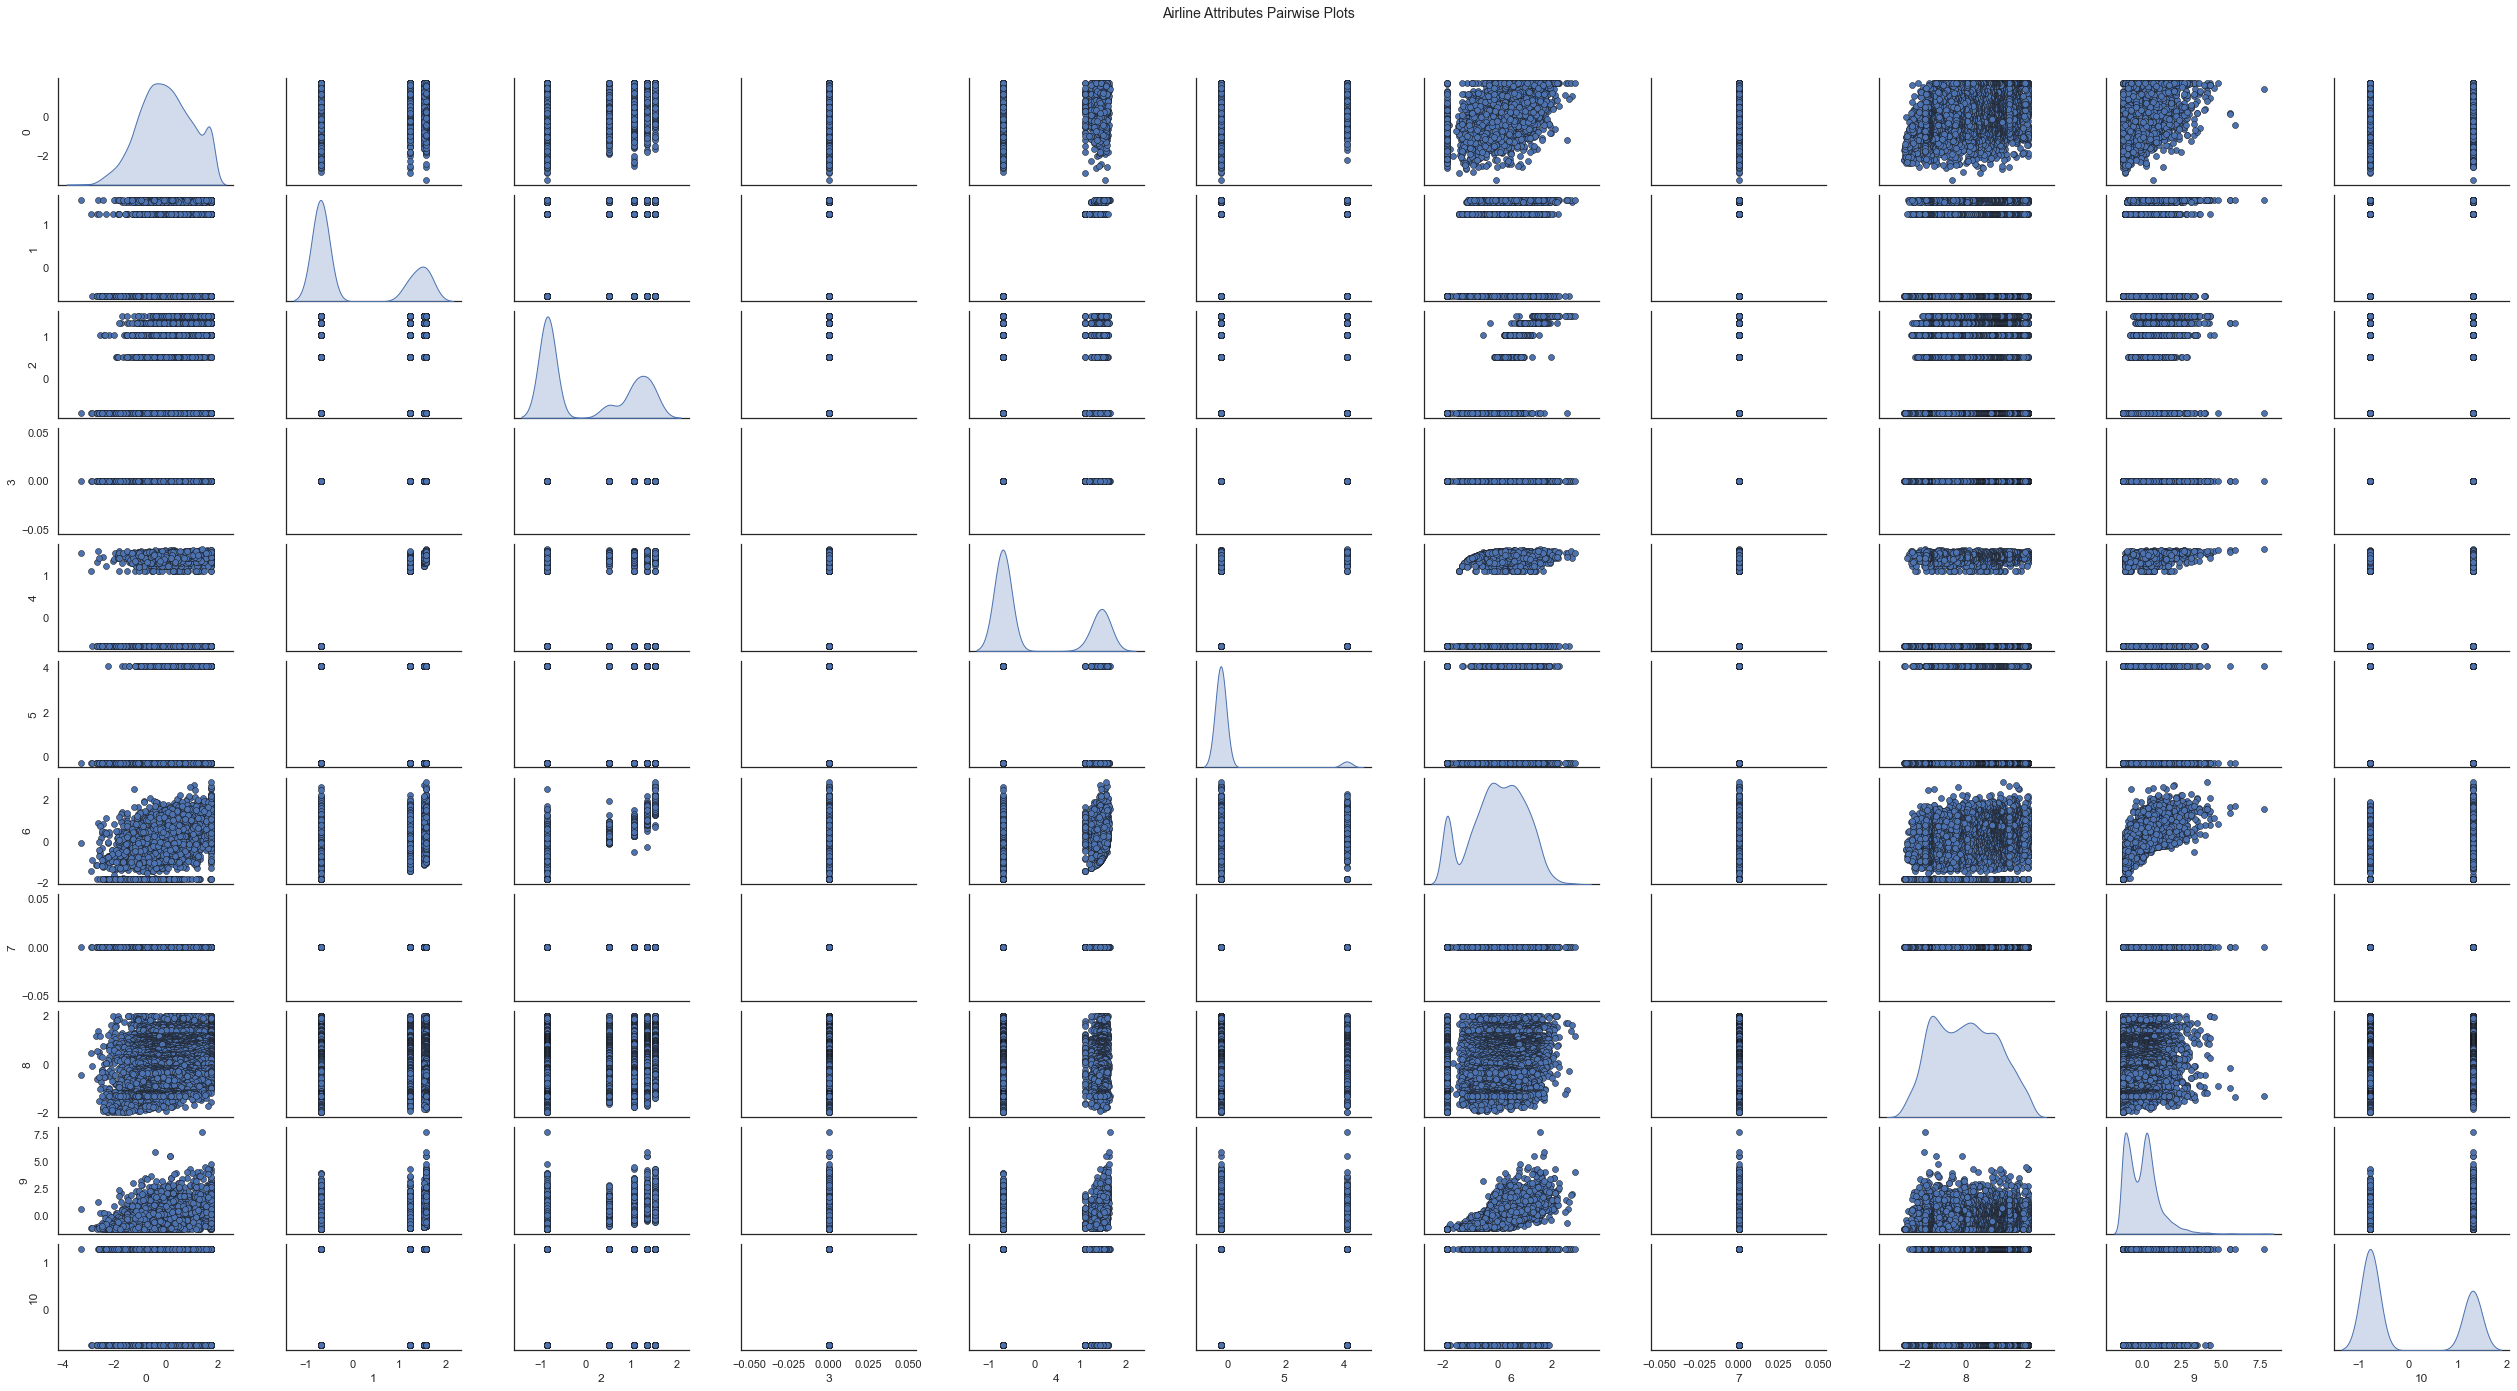

In [41]:
# Pair-wise Scatter Plots
wt = pd.DataFrame(airline1_transformed)
pp = sns.pairplot(wt, height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Airline Attributes Pairwise Plots', fontsize=14)

In [42]:
# View Tranformation steps
pipe.named_steps

{'outlierTreatment': ColumnTransformer(remainder='passthrough',
                   transformers=[('outlier_capper', OutlierCapper(),
                                  [0, 2, 3, 5, 6, 8])]),
 'yeojohnson': ColumnTransformer(remainder='passthrough',
                   transformers=[('ptransform',
                                  PowerTransformer(standardize=False),
                                  [0, 2, 3, 5, 6, 8, 9])]),
 'scaling': ColumnTransformer(transformers=[('scale', StandardScaler(),
                                  slice(0, 11, None))])}

### Model Building

#### K Means Clustering

##### Evaluate k with Elbow Graph

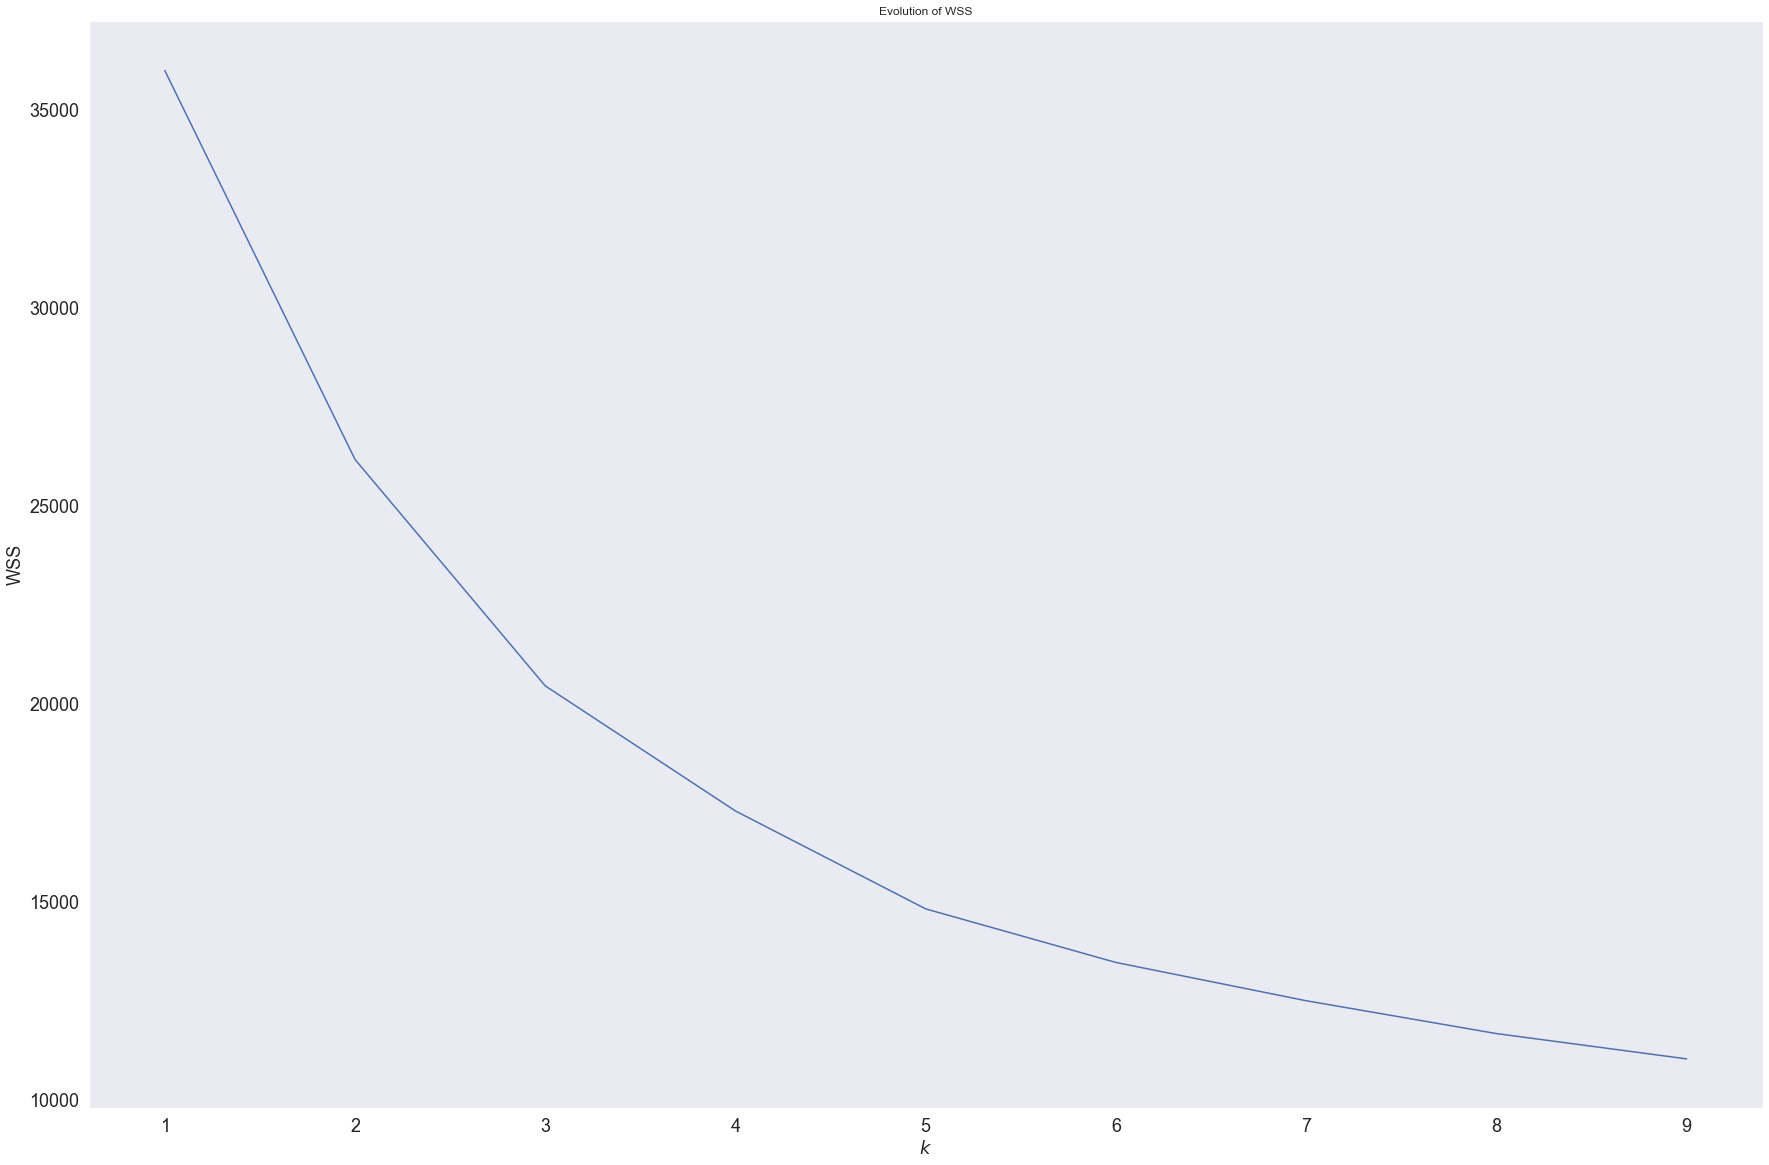

In [57]:
from sklearn.cluster import KMeans

inertia = []
k = range(1,10)
for iter in k:
    kmeans = KMeans(init = 'k-means++',n_clusters=iter, random_state=2)
    kmeans.fit(airline1_transformed)
    y_kmeans = kmeans.predict(airline1_transformed)
    centers = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_ ) # we already store this for later, inertia=WSS

plt.figure()
plt.title("Evolution of WSS")
plt.plot(k, inertia)
plt.ylabel("WSS",fontsize=18)
plt.xlabel("$k$",fontsize=18)
plt.xticks(k,fontsize=18)
plt.yticks(fontsize=18)
plt.show()

##### Apply K Means clustering

In [46]:
kmeans = KMeans(init = 'k-means++' ,n_clusters=3, random_state=2)
kmeans.fit(airline1_transformed)
labels_ = kmeans.predict(airline1_transformed)

In [48]:
# Data points spread
kmeans.labels_

array([0, 0, 0, ..., 2, 1, 0])

In [49]:
# Data points count per label
unique, counts = np.unique(labels_, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 1580],
       [   1, 1228],
       [   2, 1191]], dtype=int64)

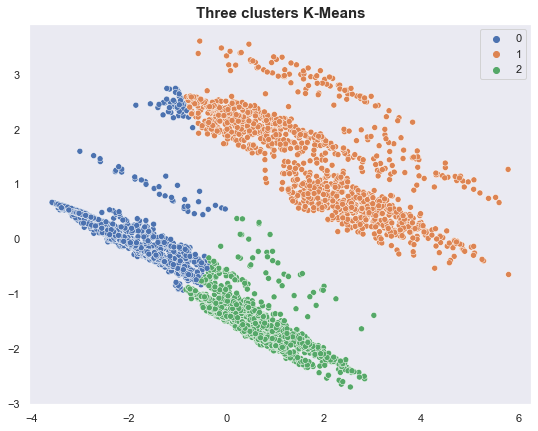

In [51]:
from sklearn import decomposition
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
wine_pca = pca.fit_transform(airline1_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=kmeans.labels_, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("Three clusters K-Means",fontsize=15,fontweight="bold")
plt.show()

### Benefits/impact of the solution 

In [52]:
#Link the clusters to original data

cluster_labels = pd.Series(kmeans.labels_)
airline1['cluster'] = cluster_labels # creating a new column and assigning it to new column

In [53]:
airline1

,Balance,Flight_miles_12mo,cc3_miles,Flight_trans_12,Bonus_trans,cc1_miles,Days_since_enroll,Qual_miles,cc2_miles,Bonus_miles,Award?,cluster
0,28143,0,1,0,1,1,7000,0,1,174,0,0
1,19244,0,1,0,2,1,6968,0,1,215,0,0
2,41354,0,1,0,4,1,7034,0,1,4123,0,0
3,14776,0,1,0,1,1,6952,0,1,500,0,0
4,97752,2077,1,4,26,4,6935,0,1,43300,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,200,1,1,4,1,1403,0,1,8525,1,1
3995,64385,0,1,0,5,1,1395,0,1,981,1,0
3996,73597,0,1,0,8,3,1402,0,1,25447,1,2
3997,54899,500,1,1,1,1,1401,0,1,500,0,1


In [54]:
airline1.groupby('cluster').size()

cluster
0    1580
1    1228
2    1191
dtype: int64

In [55]:
#airline1.groupby('cluster', as_index=False)['Bonus_trans','Bonus_miles'].mean()
airline1.groupby('cluster').mean()

,Balance,Flight_miles_12mo,cc3_miles,Flight_trans_12,Bonus_trans,cc1_miles,Days_since_enroll,Qual_miles,cc2_miles,Bonus_miles,Award?
cluster,,,,,,,,,,,
0,28507.262025,9.305063,1.000000,0.044304,4.746835,1.006329,3517.211392,59.441772,1.017722,2295.963291,0.130380
1,115528.231270,1486.206026,1.017101,4.416124,16.044788,2.337134,4453.230456,308.396580,1.017915,25365.090391,0.594463
2,90194.430730,0.000000,1.023510,0.000000,16.115029,3.170445,4571.249370,87.057095,1.006717,28367.999160,0.457599


In [56]:
airline1.corr()

,Balance,Flight_miles_12mo,cc3_miles,Flight_trans_12,Bonus_trans,cc1_miles,Days_since_enroll,Qual_miles,cc2_miles,Bonus_miles,Award?,cluster
Balance,1.000000,0.217551,0.035243,0.255700,0.324935,0.338344,0.263129,0.108722,-0.008804,0.403487,0.178494,0.273202
Flight_miles_12mo,0.217551,1.000000,-0.001777,0.869193,0.377216,0.037370,0.037271,0.126774,0.010598,0.183536,0.217715,0.035488
cc3_miles,0.035243,-0.001777,1.000000,-0.001117,0.097313,0.060555,0.010832,-0.007779,-0.006166,0.204134,0.023484,0.050770
Flight_trans_12,0.255700,0.869193,-0.001117,1.000000,0.432364,0.041333,0.059260,0.144004,0.028284,0.185261,0.247909,0.037031
Bonus_trans,0.324935,0.377216,0.097313,0.432364,1.000000,0.608943,0.161262,0.050725,0.064399,0.603180,0.333893,0.510484
cc1_miles,0.338344,0.037370,0.060555,0.041333,0.608943,1.000000,0.230849,0.007931,-0.068223,0.825200,0.335457,0.656288
Days_since_enroll,0.263129,0.037271,0.010832,0.059260,0.161262,0.230849,1.000000,0.017312,-0.005807,0.210397,0.188121,0.218160
Qual_miles,0.108722,0.126774,-0.007779,0.144004,0.050725,0.007931,0.017312,1.000000,-0.013923,0.031021,0.095256,0.025740
cc2_miles,-0.008804,0.010598,-0.006166,0.028284,0.064399,-0.068223,-0.005807,-0.013923,1.000000,-0.003969,0.005332,-0.029418
Bonus_miles,0.403487,0.183536,0.204134,0.185261,0.603180,0.825200,0.210397,0.031021,-0.003969,1.000000,0.373506,0.461307


* Observe a strong correlation between cluster and Bonus miles. 
* We have 1191 people who have not flown in the past 12 months  (cluster 1)
* Would target the above group by increasing the incentive for cc2 and cc3 miles.  
* Would increase the bonus miles for the above group.  
